In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rc
%matplotlib inline

rc('axes', linewidth=2)

In [3]:
luna_time = [880, 872, 89, 9.5, 15]
luna_speed = 60. / np.array(luna_time)
luna_recall = [.77, .78, .68, .62, .80]
luna_objdsc = [.82, .78, .75, .70, .75]

met_time = [225, 254, 23, 1.7, 4.3]
met_speed = 60. / np.array(met_time)
met_recall = [.71, .70, .65, .47, .68]
met_objdsc = [.72, .69, .69, .59, .64]

colors = sns.color_palette(palette='colorblind', n_colors=5)
markers = ['o', 'v', 's', 'p', '*']
labels = ['3D U-Net', 'DeepMedic', 'MobileNetV2', '3D E-Net', 'LowRes (ours)']

rater_time = 60.
rater_speed = 60. / rater_time

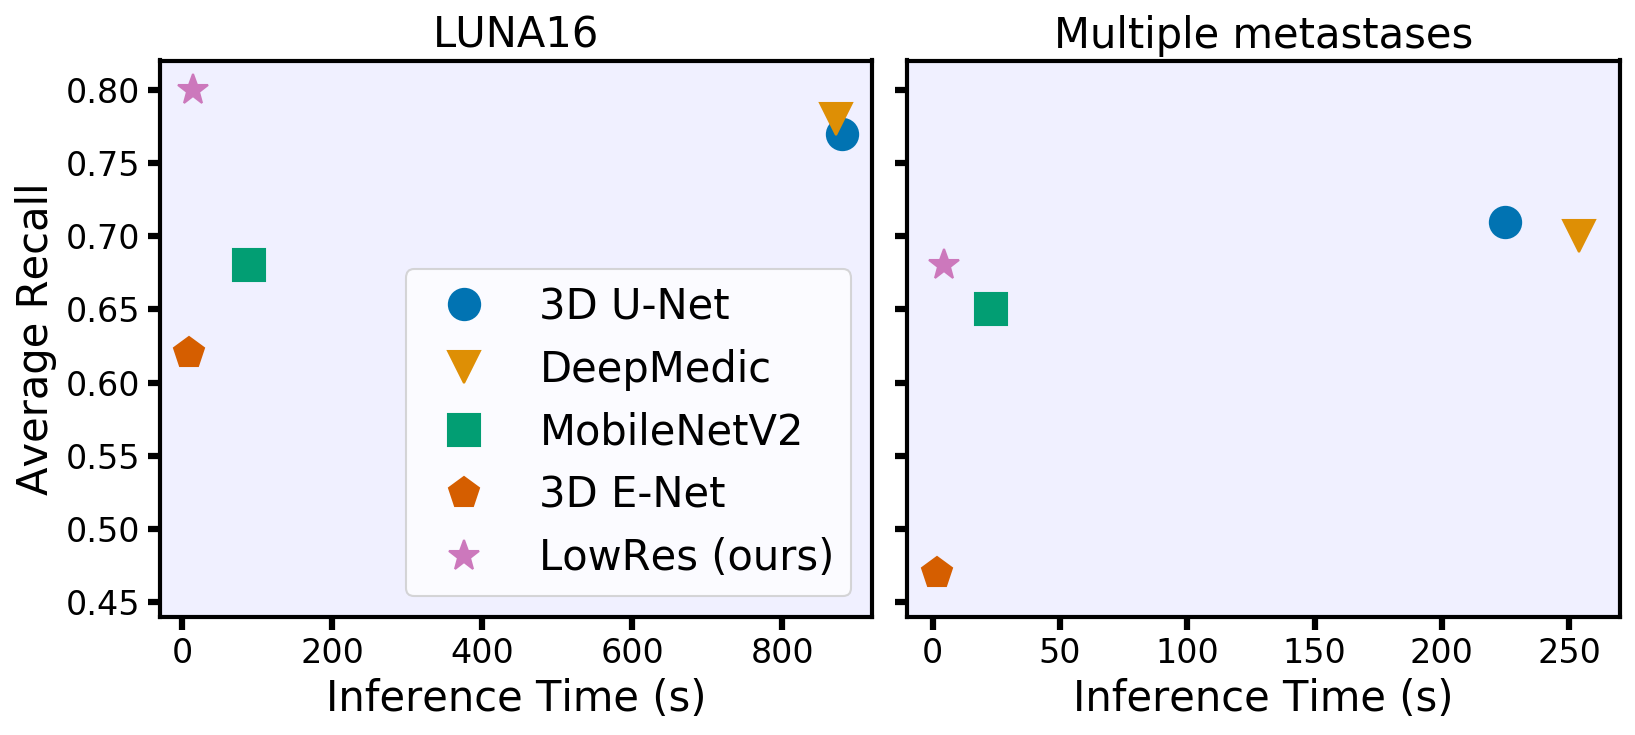

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True, dpi=150)

ylim = (0.44, 0.82)
xlim0 = (-30, 920)
xlim1 = (-10, 270)
ts = np.linspace(-1000, 1000, num=10001)

yticks = np.linspace(0.45, 0.80, num=8)
ms = 15

for x, y, m, l, c in zip(luna_time, luna_recall, markers, labels, colors):
    axs[0].plot(x, y, marker=m, label=l, color=c, ms=ms, lw=0)
    
    axs[0].set_ylim(ylim)
    axs[0].set_xlim(xlim0)
    axs[0].set_yticks(yticks)
    axs[0].yaxis.set_tick_params(labelsize=16, width=3, length=6)
    axs[0].xaxis.set_tick_params(labelsize=16, width=3, length=6)
    
    axs[0].fill_between(ts, 0, 1, where=ts >= xlim0[0], color='b', alpha=0.01)
    
    axs[0].set_title('LUNA16', fontsize=20)
    axs[0].set_ylabel('Average Recall', fontsize=20)
    axs[0].set_xlabel('Inference Time (s)', fontsize=20)
    axs[0].legend(loc=4, fontsize=20)

for x, y, m, l, c in zip(met_time, met_recall, markers, labels, colors):
    axs[1].plot(x, y, marker=m, label=l, color=c, ms=ms, lw=0)
    
    axs[1].set_ylim(ylim)
    axs[1].set_xlim(xlim1)
    axs[1].xaxis.set_tick_params(labelsize=16, width=3, length=6)
    axs[1].yaxis.set_tick_params(labelsize=16, width=3, length=6)
    
    axs[1].fill_between(ts, 0, 1, where=ts >= xlim1[0], color='b', alpha=0.01)
    
    axs[1].set_title('Multiple metastases', fontsize=20)
    axs[1].set_xlabel('Inference Time (s)', fontsize=20)

plt.tight_layout()
plt.show()